# Wisconsin Breast Cancer

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [35]:
df = pd.read_csv('data/wdbc.data', header=None)

In [36]:
features = [
    'radius',
    'texture',
    'perimeter',
    'area',
    'smoothness',
    'compactness',
    'concavity',
    'concave points',
    'symmetry', 
    'fractal dimension' 
]
mean_features = [f'{f}_mean' for f in features]
se_features = [f'{f}_se' for f in features]
worst_features = [f'{f}_worst' for f in features]

columns = [
    'id_number',
    'diagnosis'] + mean_features + se_features + worst_features
    

In [37]:
df.columns = columns
df

,id_number,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_number,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [39]:
df.isna().sum()

id_number                  0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal dimension_worst    0
dtype: int64

In [40]:
df.diagnosis.replace(['M','B'],[1,0], inplace=True)

In [41]:
df.drop(['id_number'], axis=1, inplace=True)

In [42]:
def plot_correlations(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8))

    # Choose a colormap
    cmap = plt.get_cmap("rainbow")

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, robust=True, center=0,
               square=True, linewidths=.5, cbar_kws={"shrink": .5},
               vmin=-1, vmax=1)

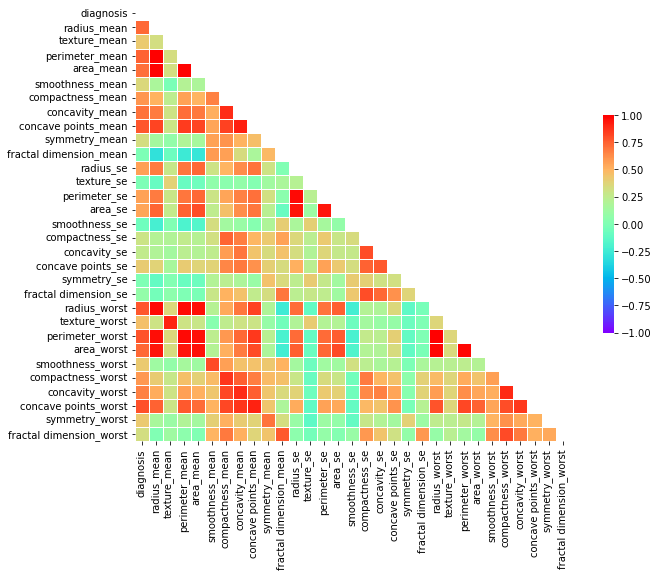

In [43]:
plot_correlations(df)

In [44]:
corr = df.corr()
corr[corr > 0.8].fillna('NA')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
diagnosis,1.0,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
radius_mean,NA,1.0,NA,0.997855,0.987357,NA,NA,NA,0.822529,NA,...,0.969539,NA,0.965137,0.941082,NA,NA,NA,NA,NA,NA
texture_mean,NA,NA,1.0,NA,NA,NA,NA,NA,NA,NA,...,NA,0.912045,NA,NA,NA,NA,NA,NA,NA,NA
perimeter_mean,NA,0.997855,NA,1.0,0.986507,NA,NA,NA,0.850977,NA,...,0.969476,NA,0.970387,0.94155,NA,NA,NA,NA,NA,NA
area_mean,NA,0.987357,NA,0.986507,1.0,NA,NA,NA,0.823269,NA,...,0.962746,NA,0.95912,0.959213,NA,NA,NA,NA,NA,NA
smoothness_mean,NA,NA,NA,NA,NA,1.0,NA,NA,NA,NA,...,NA,NA,NA,NA,0.805324,NA,NA,NA,NA,NA
compactness_mean,NA,NA,NA,NA,NA,NA,1.0,0.883121,0.831135,NA,...,NA,NA,NA,NA,NA,0.865809,0.816275,0.815573,NA,NA
concavity_mean,NA,NA,NA,NA,NA,NA,0.883121,1.0,0.921391,NA,...,NA,NA,NA,NA,NA,NA,0.884103,0.861323,NA,NA
concave points_mean,NA,0.822529,NA,0.850977,0.823269,NA,0.831135,0.921391,1.0,NA,...,0.830318,NA,0.855923,0.80963,NA,NA,NA,0.910155,NA,NA
symmetry_mean,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.0,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [45]:
high_correlated_features = ['radius_mean','area_mean','perimeter_mean', 'concave points_mean', 'perimeter_worst', 'area_worst']
df = df.drop(high_correlated_features, axis=1)
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal dimension_worst'],
      dtype='object')

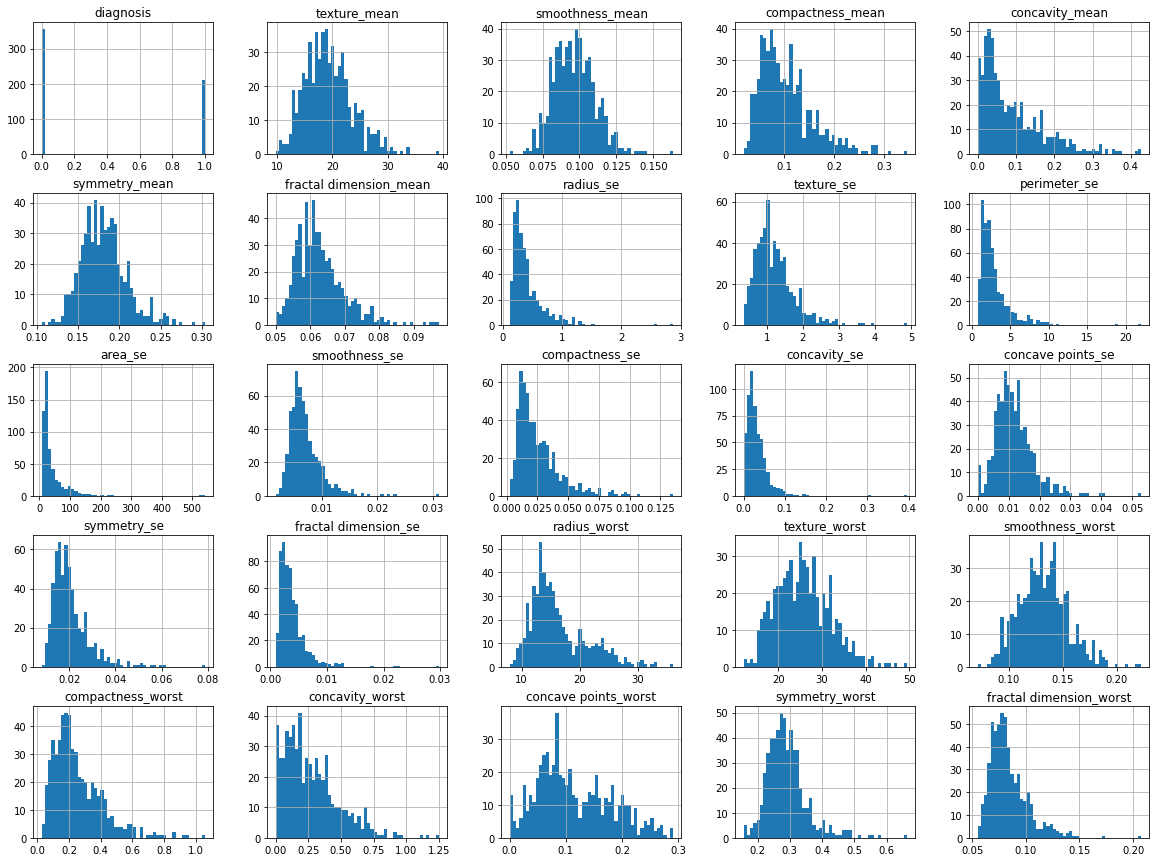

In [46]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [47]:
X = df.drop(['diagnosis'], axis=1)
y = df.diagnosis

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
clf = LogisticRegression(solver='liblinear', C=0.8, tol=1.e-6, class_weight='balanced', max_iter=100)

In [51]:
clf.fit(X_train_scaled,y_train)

LogisticRegression(C=0.8, class_weight='balanced', solver='liblinear',
                   tol=1e-06)

In [52]:
y_pred = clf.predict(X_test_scaled)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [53]:
f1_score(y_test, y_pred)

0.96

Optimal number of features: 17
   texture_mean  smoothness_mean  concavity_mean  fractal dimension_mean  \
0      1.049745         2.276458        3.539139                2.639773   
1     -0.909945        -0.065868        0.393543               -0.401530   
2     -0.993336        -0.916169       -0.567530               -0.512454   
3      1.418055         0.329734        0.983188               -0.555982   
4     -0.972488         1.205760        0.137701                0.117991   

   radius_se  texture_se  perimeter_se   area_se  compactness_se  \
0   1.886582    1.200053      2.872750  1.749217        2.415587   
1  -0.250414   -0.844424     -0.118574 -0.161492        0.408546   
2  -0.958073   -1.214530     -0.877833 -0.665315        0.262631   
3   0.441432    0.808198      0.446896  0.419099        3.377178   
4   0.376381   -0.863118      0.470250  0.056632        1.060974   

   concave points_se  symmetry_se  fractal dimension_se  radius_worst  \
0           2.297848     6.944

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


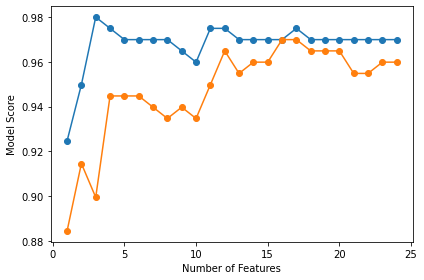

In [54]:
import pandas as pd
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

feature_selector = RFECV(clf, cv=StratifiedKFold(2)) # default = 5 portions

X_train_scaled_to_df = pd.DataFrame(X_train_scaled, columns = X_train.columns)
fit = feature_selector.fit(X_train_scaled_to_df,y_train)
optimal_feat_count = feature_selector.n_features_
print(f'Optimal number of features: {optimal_feat_count}')

X_new = X_train_scaled_to_df.loc[:, feature_selector.get_support()]
print(X_new.head())

plt.plot(range(1,len(fit.grid_scores_)+1), fit.grid_scores_, marker='o')
plt.ylabel('Model Score')
plt.xlabel('Number of Features')
#plt.title(f'Feature Selection using RFE \n Optimal number of features is {optimal_feat_count} (at score of {round(max(fit.grid_scores_),4)})')
plt.tight_layout()
plt.show()

In [55]:
feature_selector

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=0.8, class_weight='balanced',
                                   solver='liblinear', tol=1e-06))

In [56]:
selection = feature_selector.get_support() * 1
cols = list(X.columns)
cols_to_delete = [col for col,sel in zip(cols,selection) if sel == 0]
cols_to_delete

['compactness_mean',
 'symmetry_mean',
 'smoothness_se',
 'concavity_se',
 'smoothness_worst',
 'compactness_worst',
 'fractal dimension_worst']

In [57]:
X.columns

Index(['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal dimension_worst'],
      dtype='object')

In [58]:
X = X.drop(cols_to_delete, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf.fit(X_train_scaled,y_train)

LogisticRegression(C=0.8, class_weight='balanced', solver='liblinear',
                   tol=1e-06)

In [59]:
X.columns

Index(['texture_mean', 'smoothness_mean', 'concavity_mean',
       'fractal dimension_mean', 'radius_se', 'texture_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concave points_se', 'symmetry_se',
       'fractal dimension_se', 'radius_worst', 'texture_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst'],
      dtype='object')

In [60]:
y_pred = clf.predict(X_test_scaled)
f1_score(y_test, y_pred)

0.96

In [61]:
fit.cv_results_

{'mean_test_score': array([0.90452261, 0.9321608 , 0.93969849, 0.95979899, 0.95728643,
        0.95728643, 0.95477387, 0.95226131, 0.95226131, 0.94723618,
        0.96231156, 0.96984925, 0.96231156, 0.96482412, 0.96482412,
        0.96984925, 0.97236181, 0.96733668, 0.96733668, 0.96733668,
        0.96231156, 0.96231156, 0.96482412, 0.96482412]),
 'std_test_score': array([0.0201005 , 0.01758794, 0.04020101, 0.01507538, 0.01256281,
        0.01256281, 0.01507538, 0.01758794, 0.01256281, 0.01256281,
        0.01256281, 0.00502513, 0.00753769, 0.00502513, 0.00502513,
        0.        , 0.00251256, 0.00251256, 0.00251256, 0.00251256,
        0.00753769, 0.00753769, 0.00502513, 0.00502513]),
 'split0_test_score': array([0.92462312, 0.94974874, 0.9798995 , 0.97487437, 0.96984925,
        0.96984925, 0.96984925, 0.96984925, 0.96482412, 0.95979899,
        0.97487437, 0.97487437, 0.96984925, 0.96984925, 0.96984925,
        0.96984925, 0.97487437, 0.96984925, 0.96984925, 0.96984925,
        0.

In [62]:
summary = pd.DataFrame(clf.coef_)
summary.columns = list(X_train.columns)
clf.intercept_

array([-0.22606836])

In [63]:
summarys = summary.T.sort_values(by=0, ascending=False)
summarys

,0
radius_worst,1.912761
texture_worst,1.424585
area_se,1.207509
radius_se,1.206767
concavity_mean,1.022797
concave points_worst,0.964469
symmetry_worst,0.843820
perimeter_se,0.803848
smoothness_mean,0.628535
concavity_worst,0.571883


In [64]:
clf.coef_.shape

(1, 17)

In [65]:
summary = pd.DataFrame(clf.coef_ / scaler.scale_)
summary.columns = list(X.columns)
summary.T

,0
texture_mean,0.096557
smoothness_mean,43.699405
concavity_mean,12.616891
fractal dimension_mean,-75.093492
radius_se,4.337126
texture_se,-0.897442
perimeter_se,0.399430
area_se,0.027754
compactness_se,-47.563221
concave points_se,87.762980


<img src='coeficients_table.png' width=500>

In [66]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9707602339181286
Precision: 0.9836065573770492
Recall: 0.9375
